In [23]:
import SpectralSynthesis as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter

In [24]:
H_list = [1,0.5,0]
S_list = [0.1,1,2.0]
SEED = 42
N = 1000
E=2

c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\Matt\AppData\Local\Temp\ipykernel_23220\374794950.py:14: UserWarning: No contour levels were found within the data range.
  cont = ax[i,j].contour(gaussian_filter(X, sigma), levels = [], cmap='magma')
c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


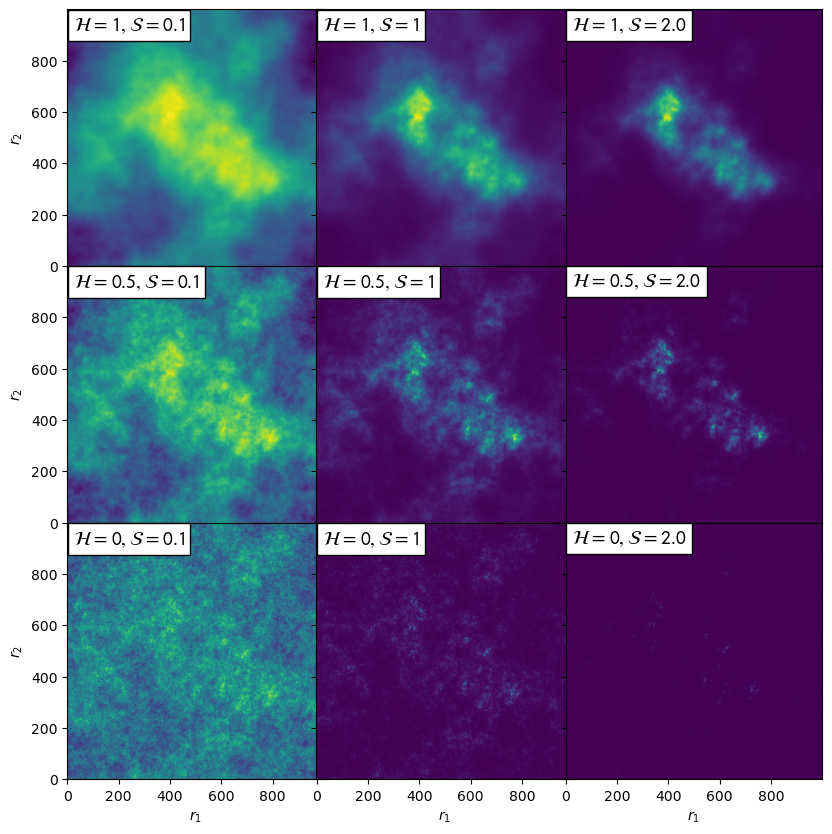

In [25]:
props = dict(facecolor='white', alpha=1)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey=True)

X_list = []


for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        X = ss.fBm(N=N, E=E, H=H, sigma=S, exp=True, centred = True, seed=SEED)
        X /= np.max(X.flatten())
        img = ax[i,j].imshow(X, origin='lower')
        cont = ax[i,j].contour(gaussian_filter(X, sigma), levels = [], cmap='magma')

        ax[i,j].clabel(cont, fmt='%1.1f', colors = 'k', fontsize=10)

        ax[i,j].text(0.025, 0.977, fr'$\cal H={H}, \cal S={S}$', transform=ax[i,j].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
        
        X_list.append(X)
        ax[i,j].set_xlabel(r'$r_1$')

    ax[i,0].set_ylabel(r'$r_2$')

f.subplots_adjust(wspace=-0.1, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm.png', bbox_inches = 'tight')
plt.show()

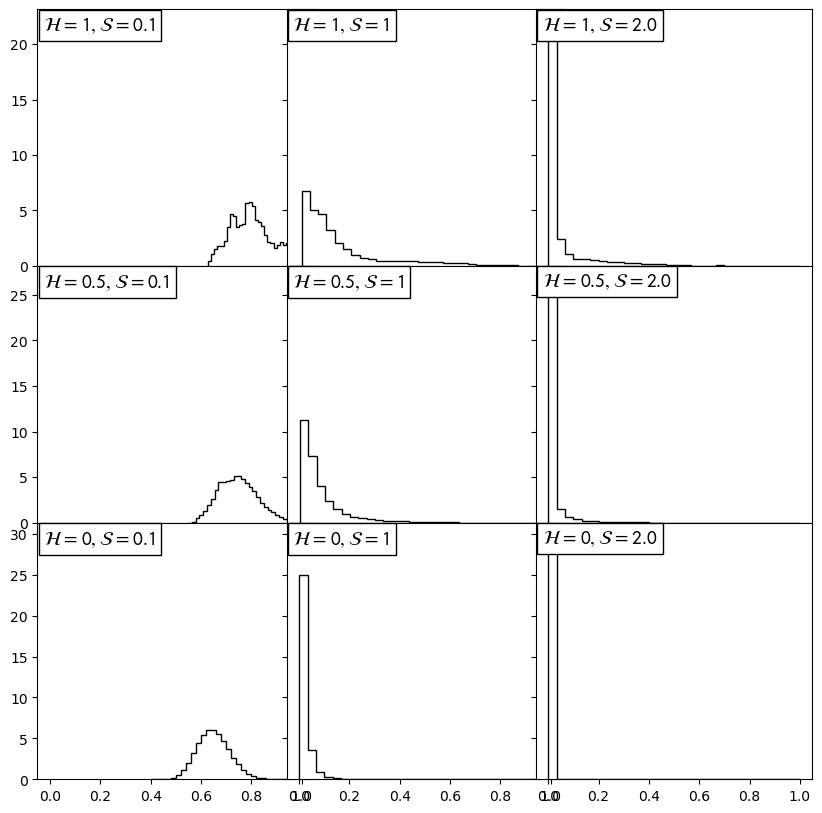

In [29]:
props = dict(facecolor='white', alpha=1)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey='row')

c=0

for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        ax[i,j].hist(X_list[c].flatten(), bins=30, density=True, histtype='step', color='k')
        ax[i,j].text(0.025, 0.977, fr'$\cal H={H}, \cal S={S}$', transform=ax[i,j].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
        c +=1

f.subplots_adjust(wspace=-0.1, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-dist.png', bbox_inches = 'tight')
plt.show()